author:jasonczc@qq.com

1.引入需要的库

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras import utils
import tensorflow.keras.layers as layers
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# C:\Users\28191\AppData\Roaming\jupyter\runtime

2.下载数据集

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

3.1 视察数据情况

In [ ]:
x_train.shape

3.2 flat数据，变为一维度

In [ ]:
reshape3to2 = lambda a : a.reshape(a.shape[0],a.shape[1]*a.shape[2])

3.3 调整数据类型变为float

In [5]:
asfloat = lambda a : a.astype('float32')

3.4 归一化

In [6]:
normalization = lambda a : a/255 # RGB的值最大是255

3.5 对结果ONE_HOT编码

In [7]:
one_hot_result = lambda a : utils.to_categorical(a,10)

3.6 处理

In [8]:
batch_handle_data = lambda a : normalization(asfloat(reshape3to2(a)))
batch_handle_tag = lambda a : one_hot_result(a)

x_train = batch_handle_data(x_train)
x_test = batch_handle_data(x_test)

y_train = batch_handle_tag(y_train)
y_test = batch_handle_tag(y_test)


#x_train = np.expand_dims(x_train, -1) #这个API可以扩展维度，比如把二维变成三维
#x_test = np.expand_dims(x_test, -1)

3.7 查看处理结果

In [9]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


4 开始构建模型-ModelOriginal

In [10]:
# 定义一个model的子类
class MNISTCnnOriginal(keras.Model):
    # 定义网络的层结构
    def __init__(self):
        super(MNISTCnnOriginal,self).__init__()
        self.layer1_dense = layers.Dense(1024,activation="relu",name="dense_layer")
        self.layer1_normalization = layers.BatchNormalization(name="normalization")
        self.layer1_dropout = layers.Dropout(0.2)

        self.layer2_dense = layers.Dense(512,kernel_regularizer=keras.regularizers.l2(0.01))
        self.layer2_normalization = layers.BatchNormalization(name="normalization")
        self.layer2_activation = layers.Activation("relu")
        self.layer2_dropout = layers.Dropout(0.2)

        self.layer_output = layers.Dense(10,activation="softmax")

    # 定义网络的前向传播
    def call(self,inputs):
        networks = [
                    self.layer1_dense,
                    self.layer1_normalization,
                    self.layer1_dropout,
                    self.layer2_dense,
                    self.layer2_normalization,
                    self.layer2_activation,
                    self.layer2_dropout,
                    self.layer_output
                    ]
        data = inputs
        for i in networks:
          data = i(data)
        return data
    

In [11]:
x_train.shape

(60000, 784)

In [12]:
model = MNISTCnnOriginal()
model(x_train)
utils.plot_model(model)
model.summary()

Model: "mnist_cnn_original"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         multiple                  803840    
                                                                 
 normalization (BatchNormali  multiple                 4096      
 zation)                                                         
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  524800    
                                                                 
 normalization (BatchNormali  multiple                 2048      
 zation)                                                         
                                                                 
 activation (Activation)     multiple           

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [14]:
history = model.fit(x_train,y_train,epochs=15,batch_size=128,validation_data=(x_test,y_test),verbose=1, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 6s 8ms/step - loss: 1.1627 - accuracy: 0.9327 - val_loss: 0.3205 - val_accuracy: 0.9602
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.3035 - accuracy: 0.9586 - val_loss: 0.2754 - val_accuracy: 0.9682
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2683 - accuracy: 0.9657 - val_loss: 0.2336 - val_accuracy: 0.9750
Epoch 4/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2463 - accuracy: 0.9695 - val_loss: 0.2784 - val_accuracy: 0.9647
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2342 - accuracy: 0.9720 - val_loss: 0.2340 - val_accuracy: 0.9760
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.2199 - accuracy: 0.9739 - val_loss: 0.2128 - val_accuracy: 0.9747
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.2125 - accuracy: 0.9759 - val_loss: 0.2319 - val_accuracy: 0.9745
Epoch 

In [15]:
x_train.shape

(60000, 784)

查看一些训练信息

In [16]:
def show_info(x):
  plt.figure()
  for i in x:
    plt.plot(i[0],label=i[1])
  plt.legend()
  plt.grid()
# 损失函数


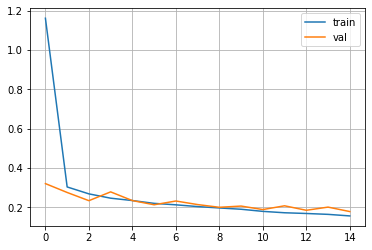

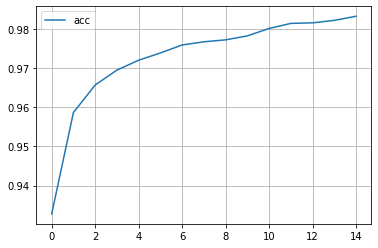

In [17]:
show_info([
           [history.history['loss'],"train"],
           [history.history["val_loss"],"val"]
           ])
show_info([
           [history.history['accuracy'],"acc"]
])